In [ ]:
pip install tensorflow


In [ ]:
# 📦 Import libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("global-data-on-sustainable-energy (1).csv")

In [ ]:
df.columns = df.columns.str.replace('\n', ' ').str.replace('\r', ' ').str.strip()

In [ ]:
df_nn = df.drop(columns=["Entity", "Year", "Density\\n(P/Km2)"], errors='ignore')

In [ ]:
df_nn = df_nn.dropna()

In [ ]:
target_col = "Access to electricity (% of population)"
X = df_nn.drop(columns=[target_col])
y = df_nn[target_col]


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1) ])

In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=0)

In [ ]:
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Mean Squared Error: 104.55
R² Score: 0.49


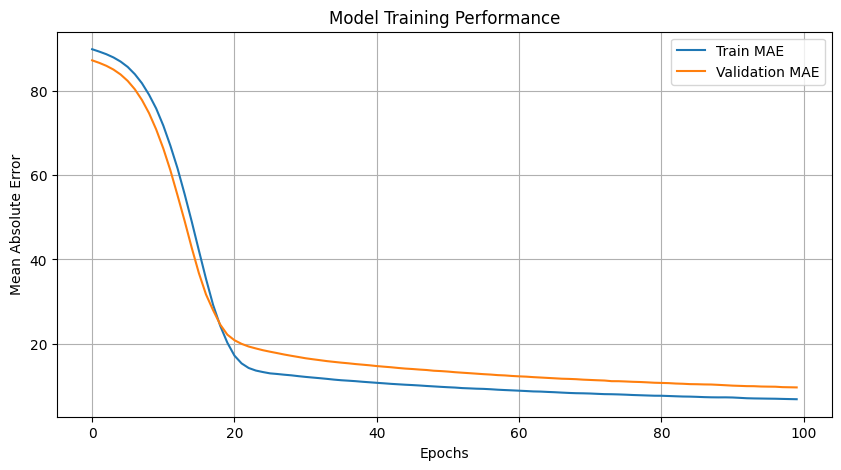

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model Training Performance')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()
